In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [82]:
# Load your dataset (replace 'data.csv' with your actual dataset)
data = pd.read_csv('Social_Network_Ads.csv')
data


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [84]:
# Assuming 'target' is your target variable and 'USERID' is not relevant for prediction
# X = data.drop[['User ID','Gender']]
X = data.drop(['User ID'],axis=1)
y = data['Purchased']
X

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [112]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)



In [114]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [115]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
# Calculate accuracy (or any other relevant metrics)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6375


In [105]:
# Get feature importance scores from the trained model
feature_importance = np.abs(model.coef_[0])
feature_importance


array([1.36613520e-10, 2.45839130e-09, 2.84171382e-06, 3.91336412e-10])

In [106]:
# Get the names of the features
feature_names = X.columns
feature_names


Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [107]:
# Create a DataFrame to store feature names and their importance scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df


,Feature,Importance
0,Gender,1.366135e-10
1,Age,2.458391e-09
2,EstimatedSalary,2.841714e-06
3,Purchased,3.913364e-10


In [108]:
# Sort the features by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)
feature_df


,Feature,Importance
2,EstimatedSalary,2.841714e-06
1,Age,2.458391e-09
3,Purchased,3.913364e-10
0,Gender,1.366135e-10


In [110]:
# Display the top N most important features 
top_n = 5
top_features = feature_df.head(top_n)
print("\nTop", top_n, "Most Important Features:")
print(top_features)




Top 5 Most Important Features:
           Feature    Importance
2  EstimatedSalary  2.841714e-06
1              Age  2.458391e-09
3        Purchased  3.913364e-10
0           Gender  1.366135e-10


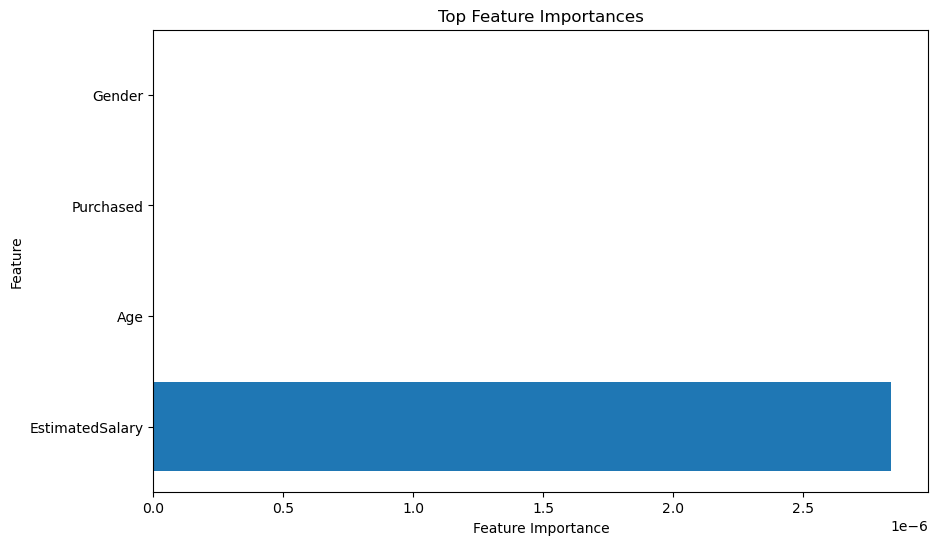

In [111]:
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()
